In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# CRL Data

In [80]:
crl_data = pd.read_csv('CRL_2022.csv')
print(crl_data)

      color team name  game duration  score  goals  assists  saves  shots  \
0      blue    KEYANO            490   1233      1        1      7     10   
1    orange      UNLV            490   1439      2        2      7     11   
2      blue    KEYANO            359   1629      4        4      7     11   
3    orange      UNLV            359   1155      2        2      7     11   
4      blue    KEYANO            337   1069      2        1      4      6   
..      ...       ...            ...    ...    ...      ...    ...    ...   
417  orange       NUW            505   1387      2        2      9      8   
418    blue  STOCKTON            356    852      1        0      5      5   
419  orange       NUW            356   1327      4        2      5     11   
420    blue  STOCKTON            282    585      1        1      3      2   
421  orange       NUW            282    484      1        0      0      4   

     shots conceded  goals conceded  ...  time in front of ball  \
0       

In [81]:
crl_data.head()

,color,team name,game duration,score,goals,assists,saves,shots,shots conceded,goals conceded,...,time in front of ball,time defensive half,time offensive half,time defensive third,time neutral third,time offensive third,time ball possession,time ball in own side,demos inflicted,demos taken
0,blue,KEYANO,490,1233,1,1,7,10,11,2,...,430.95,1048.88,400.19,816.18,395.41,237.48,199.23,292.73,1,7
1,orange,UNLV,490,1439,2,2,7,11,10,1,...,399.05,819.49,648.08,566.40,475.18,425.98,250.27,182.28,7,1
2,blue,KEYANO,359,1629,4,4,7,11,11,2,...,253.64,734.62,334.23,578.01,317.94,172.89,139.22,193.68,3,3
3,orange,UNLV,359,1155,2,2,7,11,11,4,...,310.90,651.54,416.26,481.64,312.18,273.98,136.60,135.08,3,3
4,blue,KEYANO,337,1069,2,1,4,6,8,1,...,275.53,771.19,223.11,636.77,236.32,121.21,125.89,221.46,3,6


In [82]:
for col in crl_data.columns:
    print(col)

color
team name
game duration
score
goals
assists
saves
shots
shots conceded
goals conceded
shooting percentage
bpm
avg boost amount
amount collected
amount collected big pads
amount collected small pads
count collected big pads
count collected small pads
amount stolen
amount stolen big pads
amount stolen small pads
count stolen big pads
count stolen small pads
0 boost time
100 boost time
amount used while supersonic
amount overfill total
amount overfill stolen
total distance
time slow speed
time boost speed
time supersonic speed
time on ground
time low in air
time high in air
time powerslide
count powerslide
time behind ball
time in front of ball
time defensive half
time offensive half
time defensive third
time neutral third
time offensive third
time ball possession
time ball in own side
demos inflicted
demos taken


We are going to identify which features are influential to having an aggressive or defensive playstyle
- Total Shot Ratio
- Amount stolen big pads 
- time in front of ball
- time behind ball
- time defensive half
- time offensive half
- time defensive third 
- time neutral third
- time offensive third
- time ball possesion
- time ball in own side
- demos inflicted
- demos taken

## Calculating the TSR (Total Shot Ratio)

In [83]:
shots_con_pg = crl_data["shots conceded"]
shots_pg = crl_data["shots"]
tsr = ((shots_pg)/(shots_pg + shots_con_pg))
crl_data['total Shot Ratio'] = tsr
print(crl_data['total Shot Ratio'])

0      0.476190
1      0.523810
2      0.500000
3      0.500000
4      0.428571
         ...   
417    0.421053
418    0.312500
419    0.687500
420    0.333333
421    0.666667
Name: total Shot Ratio, Length: 422, dtype: float64


In [84]:
crl_data['total Shot Ratio'].describe()

count    422.000000
mean       0.500000
std        0.151946
min        0.083333
25%        0.411765
50%        0.500000
75%        0.588235
max        0.916667
Name: total Shot Ratio, dtype: float64

- We will be creating a result column for the dataset where we will have a binary result where 1 will be a win and 0 will be a loss

In [85]:
goals = crl_data['goals']
goals_con = crl_data['goals conceded']

conditions = [
    (goals > goals_con),
    (goals < goals_con),
]

values = [1,0]

crl_data['result'] = np.select(conditions,values)
print(crl_data['result'])

0      0
1      1
2      1
3      0
4      1
      ..
417    1
418    0
419    1
420    0
421    0
Name: result, Length: 422, dtype: int32


## Data Exploration Using Correlation

In [86]:
crl_data.corr()

,game duration,score,goals,assists,saves,shots,shots conceded,goals conceded,shooting percentage,bpm,...,time offensive half,time defensive third,time neutral third,time offensive third,time ball possession,time ball in own side,demos inflicted,demos taken,total Shot Ratio,result
game duration,1.000000e+00,0.459667,0.217455,0.229213,0.214234,0.293166,0.293166,0.217455,0.101374,0.015214,...,0.534620,0.687551,0.795050,0.431100,0.693819,0.562619,0.154928,0.154928,7.596850e-17,0.009420
score,4.596673e-01,1.000000,0.794518,0.757803,0.446279,0.452029,0.259183,-0.151504,0.619604,0.087059,...,0.205687,0.397556,0.256921,0.169394,0.162037,0.219454,0.016718,0.076429,1.298817e-01,0.561491
goals,2.174548e-01,0.794518,1.000000,0.880023,-0.078665,0.480175,-0.132787,-0.089461,0.792047,0.176001,...,0.186218,0.103959,0.185792,0.158473,-0.149975,-0.109569,0.041822,0.043382,3.969994e-01,0.627421
assists,2.292127e-01,0.757803,0.880023,1.000000,-0.065456,0.431490,-0.081054,-0.036815,0.696684,0.175626,...,0.195552,0.115300,0.199455,0.159129,-0.106607,-0.078861,0.048235,-0.005195,3.372551e-01,0.530469
saves,2.142341e-01,0.446279,-0.078665,-0.065456,1.000000,-0.143522,0.744332,-0.047802,0.040450,-0.190102,...,-0.202300,0.464712,-0.092769,-0.208818,0.181573,0.456875,-0.109722,0.107746,-5.528941e-01,0.020257
shots,2.931661e-01,0.452029,0.480175,0.431490,-0.143522,1.000000,-0.192795,-0.132787,-0.032060,0.323178,...,0.583490,-0.133941,0.388935,0.586580,0.208073,-0.235150,0.117578,-0.067994,7.483832e-01,0.352170
shots conceded,2.931661e-01,0.259183,-0.132787,-0.081054,0.744332,-0.192795,1.000000,0.480175,-0.015587,-0.241289,...,-0.252770,0.590499,-0.068087,-0.271293,0.027701,0.513164,-0.067994,0.117578,-7.483832e-01,-0.336182
goals conceded,2.174548e-01,-0.151504,-0.089461,-0.036815,-0.047802,-0.132787,0.480175,1.000000,-0.055590,-0.090675,...,-0.066552,0.296540,0.074781,-0.089449,-0.193164,0.161936,0.043382,0.041822,-3.969994e-01,-0.619780
shooting percentage,1.013739e-01,0.619604,0.792047,0.696684,0.040450,-0.032060,-0.015587,-0.055590,1.000000,-0.000469,...,-0.115514,0.208371,-0.002139,-0.143718,-0.224743,0.035208,-0.045253,0.087216,1.101919e-02,0.511679
bpm,1.521367e-02,0.087059,0.176001,0.175626,-0.190102,0.323178,-0.241289,-0.090675,-0.000469,1.000000,...,0.474441,-0.362792,0.248927,0.490753,0.112066,-0.431429,0.167128,-0.034359,3.604908e-01,0.158771


In [87]:
mask = np.zeros_like(crl_data.drop(['game duration'], axis =1).corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

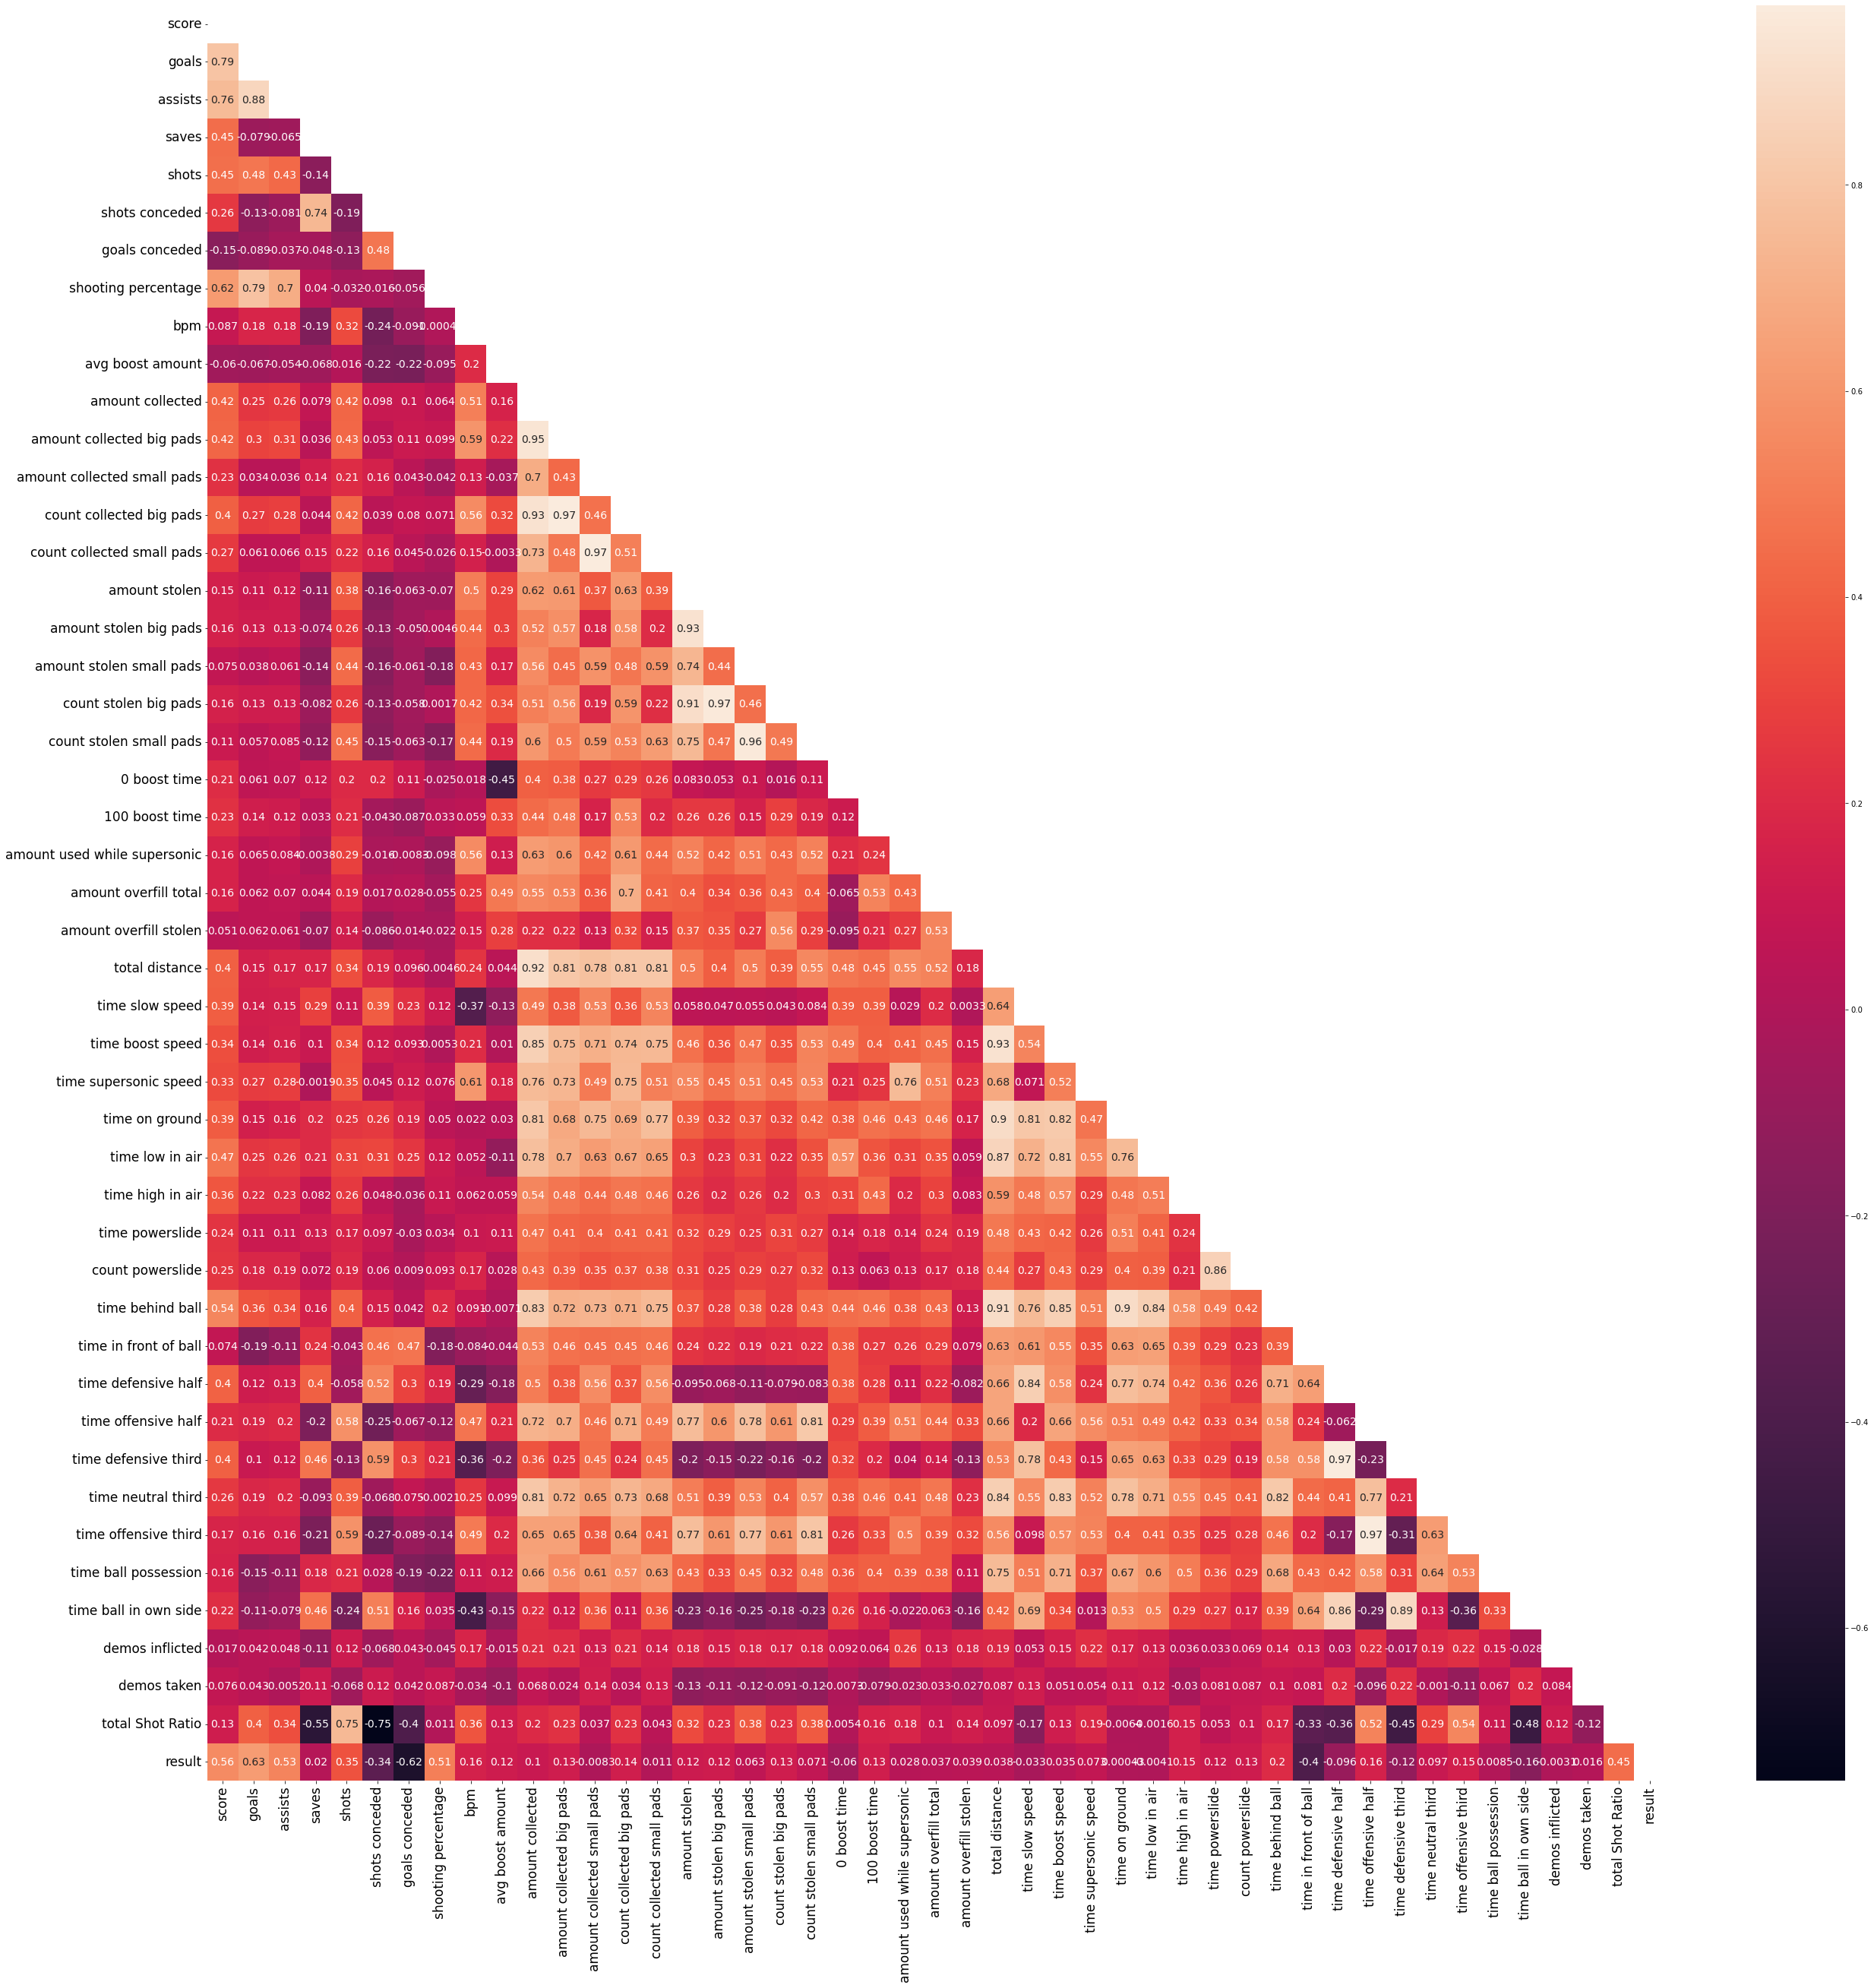

In [88]:
plt.figure(figsize = (43,43))
sns.heatmap(crl_data.drop(['game duration'], axis =1).corr(), mask = mask, annot = True, annot_kws ={"size": 14})
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.show()

## Exploring Data Distribution (time in section of field)

In [97]:
crl_data[['time defensive half','time offensive half','time defensive third','time neutral third','time offensive third']].describe(include = "all").round(decimals=2)

,time defensive half,time offensive half,time defensive third,time neutral third,time offensive third
count,422.00,422.00,422.00,422.00,422.00
mean,695.82,387.16,510.13,347.46,225.39
std,104.89,75.49,90.54,50.39,51.94
min,475.67,152.49,313.64,115.29,100.21
25%,625.92,333.09,447.26,317.22,186.90
50%,686.42,381.97,506.62,341.51,220.18
75%,745.61,430.84,556.74,368.66,256.08
max,1205.78,716.41,889.74,590.15,431.82


### Time in Defesnsive half

In [90]:
crl_data['time defensive half'].median()

686.4200000000001

<AxesSubplot:>

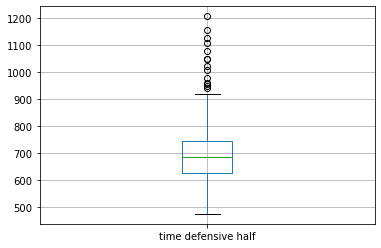

In [91]:
crl_data.boxplot(column= 'time defensive half', by= None, ax = None)

<AxesSubplot:>

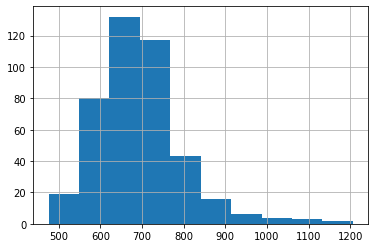

In [92]:
crl_data['time defensive half'].hist()

In [93]:
crl_data['time offensive half'].median()

381.97

<AxesSubplot:>

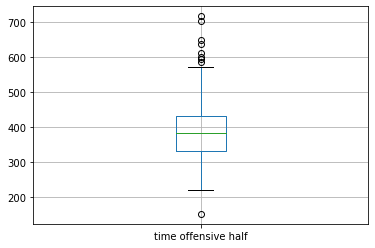

In [107]:
crl_data.boxplot(column= 'time offensive half', by= None, ax = None)

<AxesSubplot:>

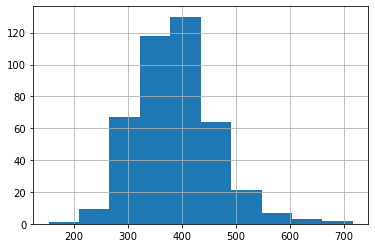

In [95]:
crl_data['time offensive half'].hist()

<AxesSubplot:>

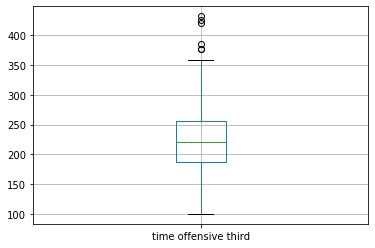

In [96]:
crl_data.boxplot(column= 'time offensive third', by= None, ax = None)

<AxesSubplot:>

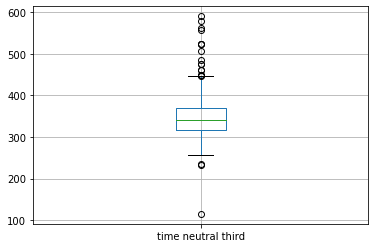

In [99]:
crl_data.boxplot(column = 'time neutral third' ,by = None, ax = None)

<AxesSubplot:>

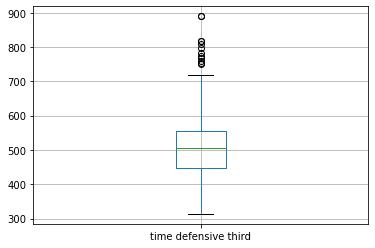

In [108]:
crl_data.boxplot(column = 'time defensive third' ,by = None, ax = None)